In [1]:
import pandas as pd
import numpy as np

In [2]:
CCTV_Seoul = pd.read_csv(
    './data_01/01. CCTV_in_Seoul.csv'
    ,encoding='utf-8'
)
CCTV_Seoul.head(3)

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204


In [3]:
# 컬럼 확인 
CCTV_Seoul.columns

Index(['기관명', '소계', '2013년도 이전', '2014년', '2015년', '2016년'], dtype='object')

#### '기관명' =>'구별'로 컬럼명 변경
- 컬럼명을 변경하는 메소드 : rename()
- inplace=True : 원본에 반영하려한다.

In [4]:
CCTV_Seoul.rename(
    columns={CCTV_Seoul.columns[0] : '구별'}
    ,inplace=True
)
CCTV_Seoul.head(3)

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204


##### 엑셀파일 =>데이터프레임 읽기 : 서울시 인구현황
- read_excel()

In [5]:
pop_Seoul = pd.read_excel(
    './data_01/01. population_in_Seoul.xls'
    ,header=2 #제거할 타이틀 수
    ,usecols='B,D,G,J,N' #가져올 컬럼을 지정
#     ,encoding = 'utf-8' 
)
pop_Seoul.head(5)

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


##### 컬럼명 변경
- 기존컬럼명 : 자치구	계	계.1	  계.2	65세이상고령자
- 변경컬럼명 : 구별   인구수 한국인 외국인    고령자

In [6]:
pop_Seoul.rename(
    columns={
         pop_Seoul.columns[0] : '구별'   # 자치구
        ,pop_Seoul.columns[1] : '인구수' # 계
        ,pop_Seoul.columns[2] : '한국인' # 계.1
        ,pop_Seoul.columns[3] : '외국인' # 계.2
        ,pop_Seoul.columns[4] : '고령자' # 65세 이상
    }
    ,inplace=True # 원본 반영
    
)

In [7]:
pop_Seoul.head(5)

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


---
#### Pandas 기초
---

날짜데이터 생성

In [8]:
dates = pd.date_range('20210401', periods=7, freq='D')

In [9]:
# index로 만들어진다.(index로 들어갈 수 있음, index는 key로 사용된다.무진장 중요하다.)
dates

DatetimeIndex(['2021-04-01', '2021-04-02', '2021-04-03', '2021-04-04',
               '2021-04-05', '2021-04-06', '2021-04-07'],
              dtype='datetime64[ns]', freq='D')

In [10]:
data = np.arange(28).reshape(7,4)
data

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27]])

In [11]:
columns_ =['A','B','C','D']
df = pd.DataFrame(
     data
    ,index=dates# 인덱스(DatetimeIndex) attribute, get/set가능
    ,columns= columns_# 컬럼 attribute, get/set가능
)
df

,A,B,C,D
2021-04-01,0,1,2,3
2021-04-02,4,5,6,7
2021-04-03,8,9,10,11
2021-04-04,12,13,14,15
2021-04-05,16,17,18,19
2021-04-06,20,21,22,23
2021-04-07,24,25,26,27


In [12]:
df.values

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27]])

In [13]:
#row쪽을 index라고 하고 column쪽을 column이라고 한다.
df.describe()

,A,B,C,D
count,7.000000,7.000000,7.000000,7.000000
mean,12.000000,13.000000,14.000000,15.000000
std,8.640988,8.640988,8.640988,8.640988
min,0.000000,1.000000,2.000000,3.000000
25%,6.000000,7.000000,8.000000,9.000000
50%,12.000000,13.000000,14.000000,15.000000
75%,18.000000,19.000000,20.000000,21.000000
max,24.000000,25.000000,26.000000,27.000000


In [14]:
# index Attribute get
df.index

DatetimeIndex(['2021-04-01', '2021-04-02', '2021-04-03', '2021-04-04',
               '2021-04-05', '2021-04-06', '2021-04-07'],
              dtype='datetime64[ns]', freq='D')

In [15]:
#정렬(sort_values method) : parameter (by, ascending, inplace)
df.sort_values(by='A', ascending=False)
#정렬하면 로우도 딱딱 바뀜

,A,B,C,D
2021-04-07,24,25,26,27
2021-04-06,20,21,22,23
2021-04-05,16,17,18,19
2021-04-04,12,13,14,15
2021-04-03,8,9,10,11
2021-04-02,4,5,6,7
2021-04-01,0,1,2,3


In [16]:
df['A'] # A 컬럼 나와라~ =>row처리 =>iloc,loc
#A컬럼과 함께 인덱스도 다 딸려나옴. because.. index==key로 사용된다.
#Series가 리턴 (index+value)

2021-04-01     0
2021-04-02     4
2021-04-03     8
2021-04-04    12
2021-04-05    16
2021-04-06    20
2021-04-07    24
Freq: D, Name: A, dtype: int32

In [17]:
#이렇게 하면 row단위로나옴....
df[0:3]

,A,B,C,D
2021-04-01,0,1,2,3
2021-04-02,4,5,6,7
2021-04-03,8,9,10,11


In [18]:
df['2021-04-01 00:00:00':'2021-04-01 00:03:00']

,A,B,C,D
2021-04-01,0,1,2,3


In [19]:
dates

DatetimeIndex(['2021-04-01', '2021-04-02', '2021-04-03', '2021-04-04',
               '2021-04-05', '2021-04-06', '2021-04-07'],
              dtype='datetime64[ns]', freq='D')

In [20]:
#값 하나하나가 다 timestamp였당.Named Index이다.
dates[0]

Timestamp('2021-04-01 00:00:00', freq='D')

In [21]:
#loc로 행을 끄집어내면 column이 index로 들어간다.
df.loc[dates[0]]

A    0
B    1
C    2
D    3
Name: 2021-04-01 00:00:00, dtype: int32

In [22]:
df.loc[:,['A','B']]

,A,B
2021-04-01,0,1
2021-04-02,4,5
2021-04-03,8,9
2021-04-04,12,13
2021-04-05,16,17
2021-04-06,20,21
2021-04-07,24,25


In [23]:
df.loc['20210402':'20210404',['A','B']]

,A,B
2021-04-02,4,5
2021-04-03,8,9
2021-04-04,12,13


In [24]:
#row를 하나 가져오게 되면, series가 되고, index는 컬럼이 된다.
df.loc['20210402',['A','B']]

A    4
B    5
Name: 2021-04-02 00:00:00, dtype: int32

In [25]:
df.loc['20210402','A']

4

In [26]:
df.iloc[3]

A    12
B    13
C    14
D    15
Name: 2021-04-04 00:00:00, dtype: int32

In [27]:
df.iloc[3:5,0:2]

,A,B
2021-04-04,12,13
2021-04-05,16,17


In [28]:
df.iloc[[1,2,4],[0,2]]

,A,C
2021-04-02,4,6
2021-04-03,8,10
2021-04-05,16,18


In [29]:
df.iloc[1:3,:]

,A,B,C,D
2021-04-02,4,5,6,7
2021-04-03,8,9,10,11


In [30]:
df.iloc[:,1:3]

,B,C
2021-04-01,1,2
2021-04-02,5,6
2021-04-03,9,10
2021-04-04,13,14
2021-04-05,17,18
2021-04-06,21,22
2021-04-07,25,26


In [31]:
#A를 df가 소유하고 있기 때문에 가지고 나올 수 있음.
df[df.A>5] #a의 값이 5이상인 A,B,C,D가 다 나온다.

,A,B,C,D
2021-04-03,8,9,10,11
2021-04-04,12,13,14,15
2021-04-05,16,17,18,19
2021-04-06,20,21,22,23
2021-04-07,24,25,26,27


In [32]:
#복사본을 넘긴다.
df2 = df.copy()

In [33]:
df2['E']=['one','two','three','four','one','two','three']

In [34]:
df

,A,B,C,D
2021-04-01,0,1,2,3
2021-04-02,4,5,6,7
2021-04-03,8,9,10,11
2021-04-04,12,13,14,15
2021-04-05,16,17,18,19
2021-04-06,20,21,22,23
2021-04-07,24,25,26,27


In [35]:
#isin => 안에 있니. => return Boolean : True/False
# sql문의 in과 같음. in [A,B,C] == A or B or C
df2['E'].isin(['two','four'])

2021-04-01    False
2021-04-02     True
2021-04-03    False
2021-04-04     True
2021-04-05    False
2021-04-06     True
2021-04-07    False
Freq: D, Name: E, dtype: bool

In [36]:
df2[df2['E'].isin(['two','four'])]

,A,B,C,D,E
2021-04-02,4,5,6,7,two
2021-04-04,12,13,14,15,four
2021-04-06,20,21,22,23,two


In [37]:
#cumsum ==> 누적합을 구하는 함수.(컬럼단위로)
df.apply(np.cumsum) 

,A,B,C,D
2021-04-01,0,1,2,3
2021-04-02,4,6,8,10
2021-04-03,12,15,18,21
2021-04-04,24,28,32,36
2021-04-05,40,45,50,55
2021-04-06,60,66,72,78
2021-04-07,84,91,98,105


In [38]:
# x 는 무엇이냐. x는 컬럼들이 들어간다. A,B,C,D 마다의 최대값-최소값(범위)을 한다.
df.apply(lambda x : x.max() - x.min())

A    24
B    24
C    24
D    24
dtype: int64

#### Pandas를 이용해서 cctv와 인구현황 데이터 파악
##### CCTV 데이터 파악

In [39]:
CCTV_Seoul.head(3)

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204


In [40]:
#소계로 정렬 : 오름차순, 상위 5개 구를 확인
CCTV_Seoul.sort_values(by='소계', ascending=False).head(5)

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
18,양천구,2034,1843,142,30,467
14,서초구,1930,1406,157,336,398
21,은평구,1873,1138,224,278,468
20,용산구,1624,1368,218,112,398


In [41]:
# 최근 증가율 확인=>컬럼으로 생성
# 최근증가율 = 2016년+2015년+2014년/2013년 이전 * 100
CCTV_Seoul['최근증가율']= (CCTV_Seoul['2016년']+\
                      CCTV_Seoul['2015년']+\
                      CCTV_Seoul['2014년'])*100/CCTV_Seoul['2013년도 이전']

In [42]:
CCTV_Seoul.sort_values(by='최근증가율',ascending=False).head(5)

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
22,종로구,1002,464,314,211,630,248.922414
9,도봉구,485,238,159,42,386,246.638655
12,마포구,574,314,118,169,379,212.101911
8,노원구,1265,542,57,451,516,188.929889
1,강동구,773,379,99,155,377,166.490765


In [43]:
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [44]:
# 합계 row를 삭제

In [45]:

#pop_Seoul.drop(삭제할로우 [],inplace=True)
pop_Seoul.drop([0],inplace=True)


In [46]:
# 구 확인- 엑셀파일을 읽었을때 조심하기-엔터치면 맨마지막 행이 nan이 발생해서 unique로 읽어줘야 한다....
pop_Seoul['구별'].unique()


array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구', nan],
      dtype=object)

In [47]:
pop_Seoul[pop_Seoul['구별'].isnull()]

,구별,인구수,한국인,외국인,고령자
26,NaN,NaN,NaN,NaN,NaN


In [48]:
# NaN 삭제
pop_Seoul.drop([26],inplace=True)

In [49]:
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0
5,광진구,372164.0,357211.0,14953.0,42214.0


In [50]:
# 외국인 비율 = 외국인 / 인구수 * 100
# 고령자 비율 = 고령자 / 인구수 * 100
pop_Seoul['외국인비율'] = pop_Seoul['외국인']/ \
                          pop_Seoul['인구수']*100
pop_Seoul['고령자비율'] = pop_Seoul['고령자']/ \
                          pop_Seoul['인구수']*100

In [51]:
pop_Seoul.sort_values(by='고령자비율', ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
9,강북구,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
13,서대문구,327163.0,314982.0,12181.0,48161.0,3.723221,14.720797


### Pandas 고급 (인구현황+cctv 병합)

In [52]:
#연습용 데이터 셋 : df1, df2, df3
df1 = pd.DataFrame(
    #키가 컬럼으로 갑니당
    {
        'A':['A0','A1','A2','A3'],
        'B':['B0','B1','B2','B3'],
        'C':['C0','C1','C2','C3'],
        'D':['D0','D1','D2','D3']
    }
    #index =row index의 값.
    , index = [0,1,2,3]

)

In [53]:
df2 = pd.DataFrame(
    #키가 컬럼으로 갑니당
    {
        'A':['A4','A5','A6','A7'],
        'B':['B4','B5','B6','B7'],
        'C':['C4','C5','C6','C7'],
        'D':['D4','D5','D6','D7']
    }
    #index =row index의 값.
    , index = [4,5,6,7]

)
df3 = pd.DataFrame(
    #키가 컬럼으로 갑니당
    {
        'A':['A8','A9','A10','A11'],
        'B':['B8','B9','B10','B11'],
        'C':['C8','C9','C10','C11'],
        'D':['D8','D9','D10','D11']
    }
    #index =row index의 값.
    , index = [8,9,10,11]

)

In [54]:
df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [55]:
df2

,A,B,C,D
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


In [56]:
df3

,A,B,C,D
8,A8,B8,C8,D8
9,A9,B9,C9,D9
10,A10,B10,C10,D10
11,A11,B11,C11,D11


In [57]:
#df1,df2,df3 붙이기(concat function) concat의 주기능 == 붙이기 그래서 join을 inner로 쓸 일이 별로 없다.
#key는 index(row index)
result = pd.concat([df1,df2,df3],keys=['1반','2반','3반'])

In [58]:
result

A    B    C    D
1반 0    A0   B0   C0   D0
   1    A1   B1   C1   D1
   2    A2   B2   C2   D2
   3    A3   B3   C3   D3
2반 4    A4   B4   C4   D4
   5    A5   B5   C5   D5
   6    A6   B6   C6   D6
   7    A7   B7   C7   D7
3반 8    A8   B8   C8   D8
   9    A9   B9   C9   D9
   10  A10  B10  C10  D10
   11  A11  B11  C11  D11

In [59]:
df4 = pd.DataFrame(
    #키가 컬럼으로 갑니당
    {
        'B':['B2','B3','B6','B7'],
        'D':['D2','D3','D6','D7'],
        'F':['F2','F3','F6','F7']
    }
    #index =row index의 값.
    , index = [2,3,6,7]

)

In [60]:
df4

,B,D,F
2,B2,D2,F2
3,B3,D3,F3
6,B6,D6,F6
7,B7,D7,F7


In [61]:
df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [62]:
result = pd.concat(
     [df1,df4]
    ,axis=1
    #,join ='outer'(default)
    ,join='inner'
)
result

,A,B,C,D,B,D,F
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3


In [63]:
# row index가 키로 사용된다.
result = pd.concat(
     [df1,df4]
    ,axis=1
    #,join ='outer'(default)
    ,join='outer'
)
result

,A,B,C,D,B,D,F
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3
6,NaN,NaN,NaN,NaN,B6,D6,F6
7,NaN,NaN,NaN,NaN,B7,D7,F7


In [64]:
result = pd.concat(
     [df1,df4]
    ,axis=1
    #,join ='outer'(default)
).reindex(df4.index) #index를 df4의 index로 맞추고 그것을 기준으로 데이터 concat
result

,A,B,C,D,B,D,F
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3
6,NaN,NaN,NaN,NaN,B6,D6,F6
7,NaN,NaN,NaN,NaN,B7,D7,F7


In [65]:
result = pd.concat(
     [df1,df4]
    ,axis=0
    ,join ='outer'
    ,ignore_index=True # 기존 인덱스를 무시하고 순서배열(axis=0일때만 일반적으로 사용한다.)
)
result

,A,B,C,D,F
0,A0,B0,C0,D0,NaN
1,A1,B1,C1,D1,NaN
2,A2,B2,C2,D2,NaN
3,A3,B3,C3,D3,NaN
4,NaN,B2,NaN,D2,F2
5,NaN,B3,NaN,D3,F3
6,NaN,B6,NaN,D6,F6
7,NaN,B7,NaN,D7,F7


In [66]:
#merge : 병합 => column : key
#concat : 붙이기.=>index : key
left = pd.DataFrame(
{
    'key':['K0','K4','K2','K3'],
    'A':['A0','A1','A2','A3'],
    'B':['B0','B1','B2','B3']
}
)
right = pd.DataFrame(
{
    'key':['K0','K1','K2','K3'],
    'C':['C0','C1','C2','C3'],
    'D':['D0','D1','D2','D3']
}
)

In [67]:
left

,key,A,B
0,K0,A0,B0
1,K4,A1,B1
2,K2,A2,B2
3,K3,A3,B3


In [68]:
right

,key,C,D
0,K0,C0,D0
1,K1,C1,D1
2,K2,C2,D2
3,K3,C3,D3


In [69]:
pd.merge(
     left
    ,right
#     ,on ='key' # on=컬럼명 (키로 사용할 , key가 같은 경우에는 on 생략가능)
#     ,how='inner'(default)
    ,how ='outer' # full outer
    
)

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K4,A1,B1,NaN,NaN
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3
4,K1,NaN,NaN,C1,D1


In [70]:
pd.merge?

- merge(컬럼기준 병합)=> how : 조인방법
    - how ='inner' : inner join
    - how ='left' : left outer join
    - how ='right' : right outer join
    - how ='outer' : full outer join

In [71]:
CCTV_Seoul.head(1)

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
0,강남구,2780,1292,430,584,932,150.619195


In [72]:
pop_Seoul.head(1)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404


In [73]:
data_result = pd.merge(
    CCTV_Seoul,
    pop_Seoul,
    on= '구별',
)

In [74]:
data_result.head(5)

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,1292,430,584,932,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,379,99,155,377,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,748,369,120,138,204,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,884,388,258,184,81,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,1496,846,260,390,613,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [75]:
#데이터프레임에서 컬럼 삭제
del data_result['2013년도 이전']
del data_result['2014년']
del data_result['2015년']
del data_result['2016년']
data_result.head(3)

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342


In [76]:
# 키로 사용될 컬럼을 인덱스로 보낸다. :set_index
data_result.set_index('구별',inplace=True)

In [77]:
data_result.head(3)

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342


#### 상관계수
- 두변수의 관계를 의미
- -1 ~ +1
- 상관계수의 값이 0에 가까워지면 : 두변수 관계없음.
- 상관계수의 값이 -1,1에 가까워지면 : 두변수 관계가 크다.
- 관계 없음 기준: 절대값 0.15 기준. 
- 관계 높음 기준: 절대값 0.75 기준. 

In [78]:
# 고령자비율, cctv의 개수의 관계 파악
np.corrcoef(data_result['고령자비율'],data_result['소계'])

array([[ 1.        , -0.28078554],
       [-0.28078554,  1.        ]])

In [79]:
# 외국인비율, cctv의 개수의 상관관계 파악
np.corrcoef(data_result['외국인비율'],data_result['소계'])

array([[ 1.        , -0.13607433],
       [-0.13607433,  1.        ]])

In [80]:
# 통계의 출발점은 분산 , 분산의 출발점은 평균.

In [81]:
# 인구수, cctv의 개수의 상관관계 파악
np.corrcoef(data_result['인구수'],data_result['소계'])

array([[1.        , 0.30634228],
       [0.30634228, 1.        ]])

In [82]:
import matplotlib.pyplot as plt

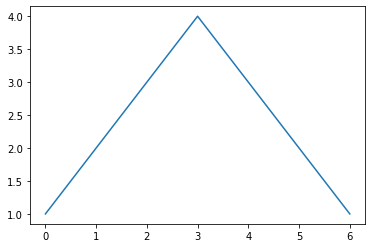

In [83]:
plt.figure(figsize=(6,4))#도화지 생성함수
plt.plot([1,2,3,4,3,2,1])# 선을 그리는 함수
#index가 x축, value가 y축으로 간다.
plt.show()# 화면에 출력하는 함수

In [84]:
import numpy as np
t = np.arange(0,12,0.01)

In [85]:
t.shape

(1200,)

In [86]:
t

array([0.000e+00, 1.000e-02, 2.000e-02, ..., 1.197e+01, 1.198e+01,
       1.199e+01])

In [87]:
y = np.sin(t)

In [88]:
len(y)

1200

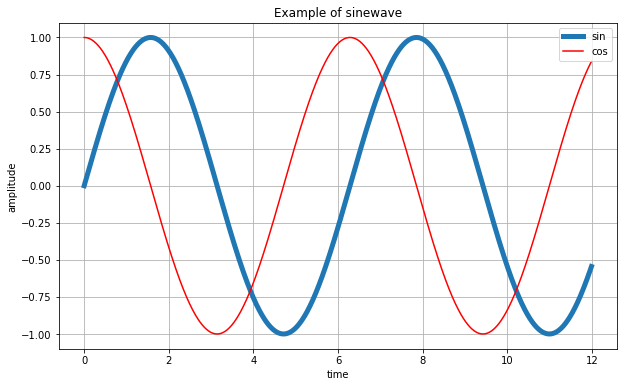

In [89]:
plt.figure(figsize=(10,6))
plt.plot(t,y,lw=5,label='sin') # lw : line width의 약자 label = 이름지정. legend = 이름을 상단에 표기
plt.plot(t,np.cos(t),'r',label='cos')#그림을 여러개 그릴 수 있다..!!!!!! 'r' ==>색깔
plt.legend()#범주를 표시하라.
plt.grid()# 그리드 적용하기 grid : 격자
plt.xlabel('time')# x축에 라벨을 적용
plt.ylabel('amplitude')# y축에 라벨을 적용
plt.title('Example of sinewave')#타이틀 적용
plt.show()

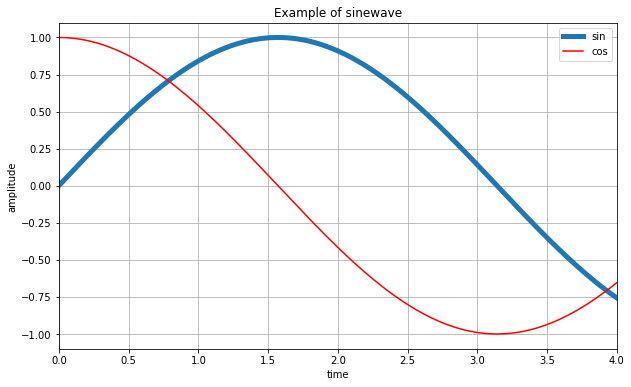

In [90]:
plt.figure(figsize=(10,6))
plt.plot(t,y,lw=5,label='sin') # lw : line width의 약자 label = 이름지정. legend = 이름을 상단에 표기
plt.plot(t,np.cos(t),'r',label='cos')#그림을 여러개 그릴 수 있다..!!!!!! 'r' ==>색깔
plt.legend()#범주를 표시하라.
plt.grid()# 그리드 적용하기 grid : 격자
plt.xlabel('time')# x축에 라벨을 적용
plt.ylabel('amplitude')# y축에 라벨을 적용
plt.title('Example of sinewave')#타이틀 적용
# X축에 0~4까지의 범위만 확인.....
plt.xlim(0,4) # x축 범위 설정
plt.show()

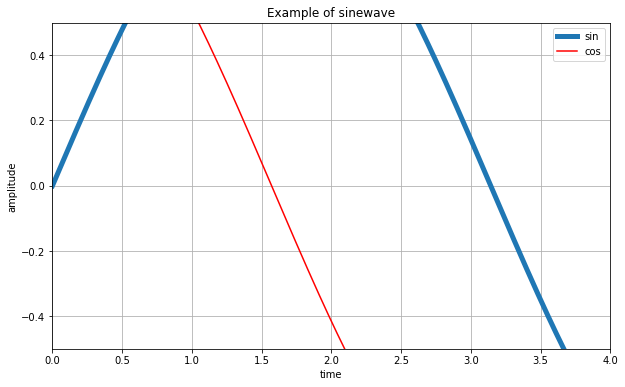

In [91]:
plt.figure(figsize=(10,6))
plt.plot(t,y,lw=5,label='sin') # lw : line width의 약자 label = 이름지정. legend = 이름을 상단에 표기
plt.plot(t,np.cos(t),'r',label='cos')#그림을 여러개 그릴 수 있다..!!!!!! 'r' ==>색깔
plt.legend()#범주를 표시하라.
plt.grid()# 그리드 적용하기 grid : 격자
plt.xlabel('time')# x축에 라벨을 적용
plt.ylabel('amplitude')# y축에 라벨을 적용
plt.title('Example of sinewave')#타이틀 적용
# X축에 0~4까지의 범위만 확인.....
plt.xlim(0,4)
plt.ylim(-0.5,0.5)
plt.show()

In [92]:
# plot : 색 지정, 모양지정, 형태지정
t = np.arange(0,5,0.5)

In [93]:
t

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5])

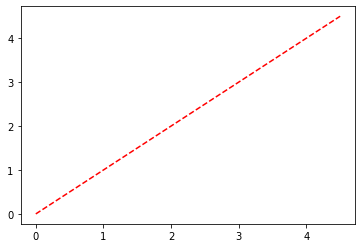

In [94]:
plt.figure(figsize=(6,4))
plt.plot(t,t,'r--')# red and dash(점선)
plt.show()

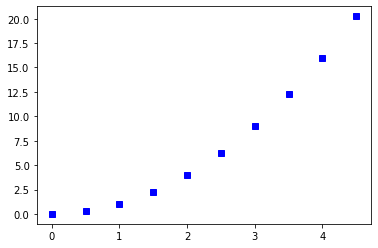

In [95]:
plt.figure(figsize=(6,4))
plt.plot(t,t**2,'bs') # b : blue, s : square
plt.show()

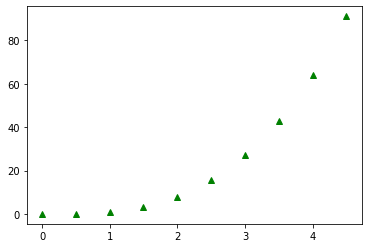

In [96]:
plt.figure(figsize=(6,4))
plt.plot(t,t**3,'g^') # g : green, ^ : 삼각형.
plt.show()

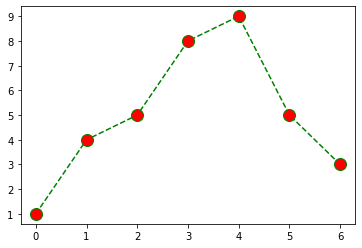

In [97]:
t=[0,1,2,3,4,5,6]
y=[1,4,5,8,9,5,3]

plt.figure(figsize=(6,4))
plt.plot(t,y
         , color='green'
         , linestyle='dashed'
         , marker='o'
         , markerfacecolor = 'red'
         , markersize=12
        )
plt.show()

In [98]:
t = np.array([0,1,2,3,4,5,6,7,8,9])
y= np.array([9,8,7,9,8,3,2,4,3,4])

C:\Users\dohoo\Anaconda3\envs\dev-ml\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49328 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dohoo\Anaconda3\envs\dev-ml\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51216 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dohoo\Anaconda3\envs\dev-ml\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dohoo\Anaconda3\envs\dev-ml\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 49328 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\dohoo\Anaconda3\envs\dev-ml\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 51216 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\dohoo\Anaconda3\envs\dev-ml\lib\site-packages\matplotlib\bac

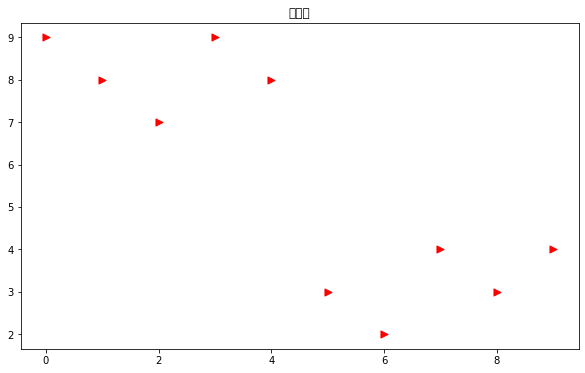

In [99]:
plt.figure(figsize=(10,6))
plt.scatter(t,y, s=50, c= 'r', marker='>') 
plt.title('산점도',)
plt.show()

In [102]:
#이거 반드시 맨처음에 써놓기

import matplotlib.pyplot as plt
from matplotlib import font_manager,rc
plt.rcParams['axes.unicode_minus']=False
path = "c:/Windows/Fonts/malgun.ttf"
font_name= font_manager.FontProperties(fname=path).get_name()
rc('font',family=font_name)

In [ ]:
data_result.head()

<AxesSubplot:ylabel='구별'>

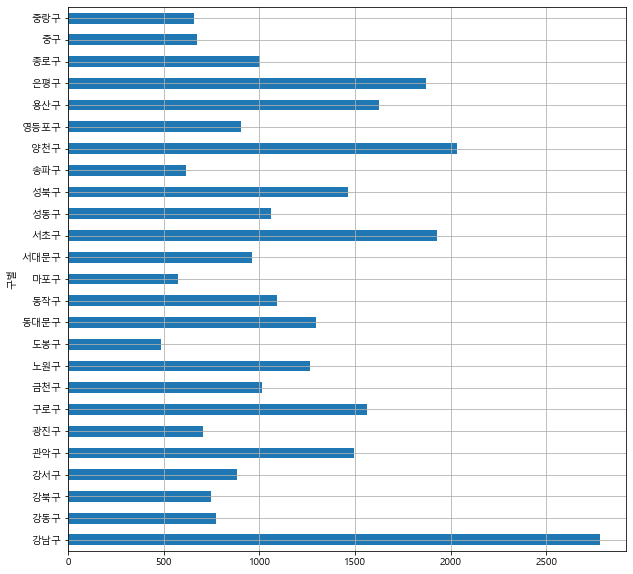

In [105]:
plt.figure()
data_result['소계'].plot(
    kind= 'barh',
    grid= True,
    figsize=(10,10)
)

<AxesSubplot:ylabel='구별'>

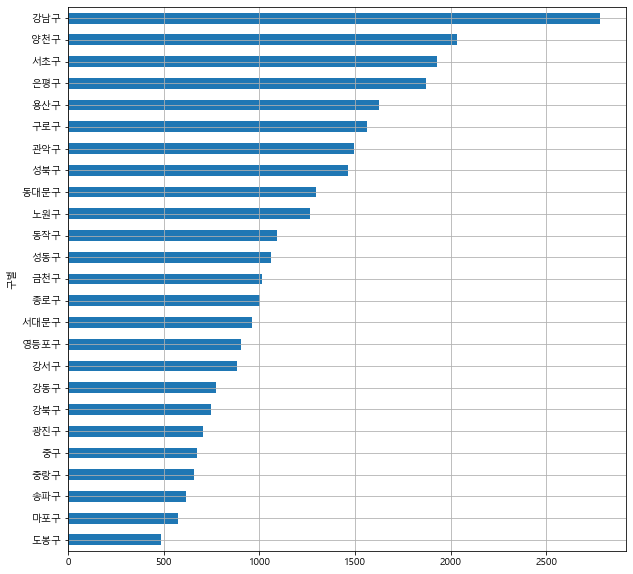

In [106]:
#비율로 바꾸어서 비교를 하자.
plt.figure()
data_result['소계'].sort_values().plot(
    kind= 'barh',
    grid= True,
    figsize=(10,10)
)

<AxesSubplot:ylabel='구별'>

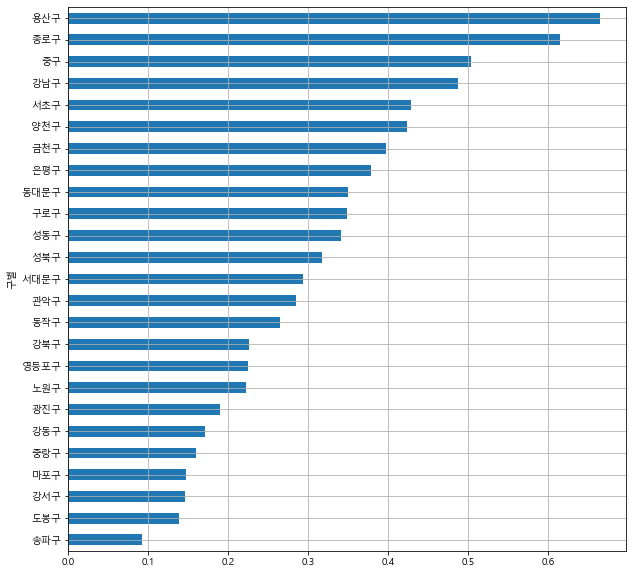

In [107]:
data_result['CCTV비율']=data_result['소계']/data_result['인구수']*100
#비율로 바꾸어서 비교를 하자.
plt.figure()
data_result['CCTV비율'].sort_values().plot(
    kind= 'barh',
    grid= True,
    figsize=(10,10)
)

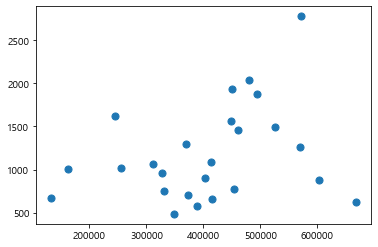

In [109]:
# 산점도 : 인구수, cctv 개수 (소계)
plt.figure()
plt.scatter(
     data_result['인구수']
    ,data_result['소계']
    ,s=50
    
)
plt.show()

- 데이터를 대표하는 직선 표시(CCTV와 인구수는 양의 상관관계)
- 함수
    - polyfit() : 지정한 특수차수의 다항식 계수를 구해준다.
    - poly1d() : 계수를 사용해서 실제 다항식을 생성
    

In [111]:
#인구수와 소계를 통해서 계수구하기
fp1 = np.polyfit(
    data_result['인구수'],
    data_result['소계']
    ,1 # 1차원
)
fp1

array([1.30916415e-03, 6.45066497e+02])

In [112]:
# 다항식 생성 식을 만들었다
f1 = np.poly1d(fp1)
f1

poly1d([1.30916415e-03, 6.45066497e+02])

In [113]:
# x(인구수)를 함수에 대입하면 => 소계가 나올 것이당.
#fx : f = function x = (인구수)
# linspace(Start,End, count) linspace(0,10,2) =>array([0,10])
fx = np.linspace(100000,700000,100)

In [116]:
fx.shape

(100,)

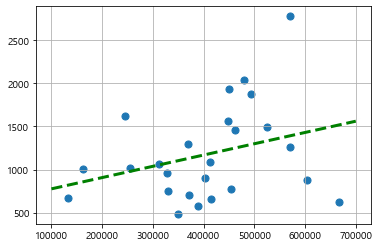

In [118]:
# 산점도 : 인구수, cctv 개수 (소계)
plt.figure()
plt.scatter(
     data_result['인구수']
    ,data_result['소계']
    ,s=50
    
)
# ls= line style
plt.plot(fx,f1(fx),lw=3,ls='--',color='g')
plt.grid()
plt.show()

In [125]:
data_result.loc['강남구','소계']-f1(data_result.loc['강남구','인구수'])

1388.0553551306011

In [126]:
data_result['오차'] = np.abs(data_result['소계']-f1(data_result['인구수']))

In [127]:
df_sort = data_result.sort_values(by='오차', ascending=False)

In [129]:
df_sort.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217,0.487292,1388.055355
송파구,618,104.347826,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599,0.092587,900.911312
양천구,2034,34.671731,479978.0,475949.0,4029.0,52975.0,0.839413,11.036964,0.423769,760.563512
서초구,1930,63.371266,450310.0,445994.0,4316.0,51733.0,0.958451,11.488308,0.428594,695.403794
용산구,1624,53.216374,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427,0.665020,659.231690


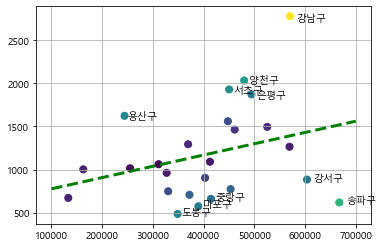

In [133]:
# 오차가 많은 10개 구의 이름 표시하기
# 산점도 : 인구수, cctv 개수 (소계)
plt.figure()
plt.scatter(
     data_result['인구수']
    ,data_result['소계']
    ,c=data_result['오차']
    ,s=50
    
)
# ls= line style
plt.plot(fx,f1(fx),lw=3,ls='--',color='g')
# 오차가 많은 10개 구(index)의 이름 표시하기
for n in range(10): #10번 반복하라.
    plt.text(df_sort['인구수'][n] * 1.02#1번째 값 : x축위치 +2%더해서
    ,df_sort['소계'][n] * 0.98#2번째 값 : y축위치 -2%빼서
    ,df_sort.index[n]#3번째 값 : 출력될 값
    ,fontsize=10     #4번째 값 : 글자의 크기
) # 차트에 텍스트 출력
plt.grid()
plt.show()